In [1]:
 s = '''hello. how are you?
 good
 so what'''

In [2]:
s.split(' ')

['hello.', 'how', 'are', 'you?\ngood\nso', 'what']

In [3]:
s.split()

['hello.', 'how', 'are', 'you?', 'good', 'so', 'what']

# Data Tables and Transforms
by Chris North, Virginia Tech

Also: python Pandas

Data files used:  Counties2010.csv, States2010.csv


## Tools:  Pandas

Data Table = `pandas.DataFrame`
* `conda install pandas`
* or check Anaconda Navigator | Environments | Installed

Python Pandas reference:
* Pandas library: http://pandas.pydata.org
* Pandas cheat sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* NumPy library: http://www.numpy.org
* Pandas for Everyone, Chapter 2, Chapter 4 (union, join), Chapter 9 (apply), Chapter 10 (groupby)
* Python for Data Analysis, Chapter 5, Chapter 9 (Groupby)

In [4]:
import pandas

In [5]:
pandas._version.get_versions()

{'date': '2022-04-02T08:46:16+0100',
 'dirty': False,
 'error': None,
 'full-revisionid': '4bfe3d07b4858144c219b9346329027024102ab6',
 'version': '1.4.2'}

In [6]:
pandas.__version__

'1.4.2'

## Data table

* table, rows (axis=0), columns (axis=1), values
* n = cardinality (rows)
* p = dimensionality (columns)
* row labels (index but not index!?!)
* column names
* CSV files
* data types:
    * numeric: int, float
    * categorical, nominal:  string (object)

![](https://i.imgur.com/zfxLzEv.png)

In [7]:
dt = pandas.read_csv('Counties2010.csv')
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09


In [8]:
type(dt)

pandas.core.frame.DataFrame

In [9]:
r_num, cc_num = dt.shape
print (r_num, cc_num)

3146 9


In [10]:
dt.columns

Index(['Name', 'State', 'Population', 'Pop2000', 'IncomePerCapita',
       'PercentCollegeGrad', 'MedianRent', 'CommuteTime', 'LandArea'],
      dtype='object')

In [11]:
dt.describe()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
count,3.146000e+03,3.146000e+03,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000
mean,9.813908e+04,8.945388e+04,30019.454228,18.685251,453.595041,22.597934,1122.665928
std,3.127666e+05,2.922515e+05,8662.018820,8.524617,183.416560,5.546780,3609.862020
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.106600e+04,1.108125e+04,25343.750000,12.900000,332.000000,18.900000,430.610000
50%,2.583700e+04,2.454400e+04,28903.000000,16.600000,409.000000,22.300000,615.380000
75%,6.652800e+04,6.172775e+04,33363.250000,22.000000,523.000000,26.100000,923.772500
max,9.818605e+06,9.519338e+06,132728.000000,69.500000,2001.000000,42.500000,145504.790000


In [12]:
dt.dtypes

Name                   object
State                  object
Population              int64
Pop2000                 int64
IncomePerCapita         int64
PercentCollegeGrad    float64
MedianRent              int64
CommuteTime           float64
LandArea              float64
dtype: object

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3146 non-null   object 
 1   State               3146 non-null   object 
 2   Population          3146 non-null   int64  
 3   Pop2000             3146 non-null   int64  
 4   IncomePerCapita     3146 non-null   int64  
 5   PercentCollegeGrad  3146 non-null   float64
 6   MedianRent          3146 non-null   int64  
 7   CommuteTime         3146 non-null   float64
 8   LandArea            3146 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 221.3+ KB


In [14]:
pandas.options.display.min_rows = 50
pandas.reset_option('display.min_rows')
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09


In [15]:
pandas.describe_option('display')

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [default: 12] [currently: 12]
display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]
display.date_yearfirst : boolean
    When True, prints and parses dates with the year first, eg 2005/01/20
    [default: False] [currently: False]
display.encoding : str/unicode
    Defaults to the detected encoding of the console.
    Specifies the encoding to be used for strings returned by to_string,
    these are generally strings meant to be displayed on the console.
    [default: UTF-8] [curr

## Data table transforms

* [Slice](#Slice)
* [Reduce](#Reduce)
* [Map](#Map)
* [Filter](#Filter)
* [Sort](#Sort)
* [Groupby](#GroupBy)
* [Union](#Union)
* [Join](#Join)


In [16]:
dt.columns

Index(['Name', 'State', 'Population', 'Pop2000', 'IncomePerCapita',
       'PercentCollegeGrad', 'MedianRent', 'CommuteTime', 'LandArea'],
      dtype='object')

### Sort

* `d.sort_values(columnName)`
* table or column

Example: Which counties have the highest PercentCollegeGrad?

In [17]:
ds = dt.sort_values('IncomePerCapita', ascending=False)
ds

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
...,...,...,...,...,...,...,...,...,...
2877,Lexington,VA,7042,6867,0,47.6,560,13.1,2.50
2881,Lynchburg,VA,75568,65269,0,28.1,491,16.4,49.13
2883,Manassas,VA,37821,35135,0,27.7,1083,32.0,9.88
547,Kalawao,HI,90,147,0,25.6,2001,5.7,11.99


### Slice

* `d.columnName`
* `d.iloc[r:r, c:c]`
* iloc vs loc
    * iloc indexes by the current table order
    * loc uses row labels

In [18]:
dt.PercentCollegeGrad

0       12.5
1        8.5
2       32.3
3       14.4
4       14.2
        ... 
3141    49.5
3142    17.3
3143    24.5
3144    19.3
3145    47.1
Name: PercentCollegeGrad, Length: 3146, dtype: float64

In [19]:
type(dt.PercentCollegeGrad)

pandas.core.series.Series

In [20]:
dt.iloc[:,2:]

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,3141,2697,28942,12.5,475,4.5,6981.94
1,5561,5465,33318,8.5,1050,4.9,4390.28
2,291826,260283,46243,32.3,921,18.0,1704.68
3,17013,16006,26990,14.4,845,6.7,40570.00
4,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...
3141,21294,18251,132728,49.5,870,15.9,3995.38
3142,21118,19742,42621,17.3,437,20.6,2081.26
3143,8533,8289,40781,24.5,369,12.3,2238.55
3144,7208,6644,41992,19.3,388,25.3,2398.09


In [21]:
ds.iloc[5:10, 0:2]

,Name,State
308,Fairfield,CT
2040,Westchester,NY
226,San Mateo,CA
1923,Morris,NJ
223,San Francisco,CA


In [22]:
ds.loc[0]

Name                  Aleutians East
State                             AK
Population                      3141
Pop2000                         2697
IncomePerCapita                28942
PercentCollegeGrad              12.5
MedianRent                       475
CommuteTime                      4.5
LandArea                     6981.94
Name: 0, dtype: object

In [23]:
ds.iloc[0]

Name                    Teton
State                      WY
Population              21294
Pop2000                 18251
IncomePerCapita        132728
PercentCollegeGrad       49.5
MedianRent                870
CommuteTime              15.9
LandArea              3995.38
Name: 3141, dtype: object

### Reduce

* column->scalar:  `d.col.func`, `func(d.col)`
* table->row:  `d.func(axis=0)`
* table->col:  `d.func(axis=1)`

Examples: What is the mean PercentCollegeGrad?  Which county has the highest IncomePerCapita?

In [24]:
dt.Population.mean()

98139.07755880483

In [25]:
import numpy
numpy.mean(dt.Population)

98139.07755880483

In [26]:
dt.mean(axis=1)

C:\Users\Jeff Chen\AppData\Local\Temp\ipykernel_17844\3600058843.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dt.mean(axis=1)


0         6036.277143
1         7113.954286
2        85861.140000
3        14492.157143
4         7459.462857
            ...      
3141     25314.825714
3142     12291.022857
3143      8606.764286
3144      8382.098571
3145    176755.078571
Length: 3146, dtype: float64

In [27]:
## Exercise: County name with max IncomePerCapita?
dt.loc[dt.IncomePerCapita.idxmax()]

Name                    Teton
State                      WY
Population              21294
Pop2000                 18251
IncomePerCapita        132728
PercentCollegeGrad       49.5
MedianRent                870
CommuteTime              15.9
LandArea              3995.38
Name: 3141, dtype: object

### Map

* col &rarr; col: `d.col.map(func)` where func:scalar &rarr; scalar
* cols &rarr; col:  `d.col1 + d.col2`  (column math)
* table &rarr; table:  `d.applymap(func)`  where func:scalar &rarr; scalar
* table &rarr; (table or col or row):  `d.apply(func, axis)`
    * axis=0:  func:col &rarr; (col or scalar)
    * axis=1:  func:row &rarr; (row or scalar)
* [broadcasting element-wise operations](#Map-with-Broadcasting)


Example: how many college grads in each county?


In [28]:
dt['CollegeGrad'] = dt.Population * dt.PercentCollegeGrad / 100.0
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392.625
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472.685
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259.798
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449.872
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141.574
...,...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540.530
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,3653.414
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,2090.585
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09,1391.144


In [29]:
dt['CollegeGrad'] = dt['CollegeGrad'].map(int)
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
...,...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,3653
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,2090
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09,1391


### Filter

* n rows &rarr; fewer rows
* `d[ cond(d.col) ]`

Examples: Which counties are in VA? Find the college towns?

In [30]:
# State == 'VA'
dt[dt.State == 'VA']

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
2806,Accomack,VA,33164,38305,24342,17.8,444,19.8,449.50,5903
2807,Albemarle,VA,98970,79236,45275,52.5,850,21.3,720.70,51959
2808,Alexandria,VA,139966,128283,70632,59.0,1222,29.0,15.03,82579
2809,Alleghany,VA,16250,12926,27793,15.3,297,25.2,445.46,2486
2810,Amelia,VA,12690,11400,32228,9.6,561,33.7,355.27,1218
...,...,...,...,...,...,...,...,...,...,...
2937,Williamsburg,VA,14068,11998,0,48.3,819,18.8,9.02,6794
2938,Winchester,VA,26203,23585,0,28.1,717,20.4,9.23,7363
2939,Wise,VA,41452,40123,26219,11.9,357,23.2,403.19,4932
2940,Wythe,VA,29235,27599,26287,14.4,384,21.7,461.82,4209


In [31]:
len(dt[dt.State == 'VA'])

136

In [32]:
## Exercise:  find the college towns?

dt[(dt.PercentCollegeGrad > 30) & (dt.Population < 100000) & (dt.IncomePerCapita < 50000)]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
8,Haines,AK,2508,2392,46772,36.2,627,14.6,2318.60,907
10,Juneau,AK,31275,30711,44723,35.8,923,15.6,2701.93,11196
22,Skagway,AK,968,0,0,31.0,852,4.4,452.33,300
214,Nevada,CA,98764,92033,42671,32.4,960,24.4,957.77,31999
247,Archuleta,CO,12084,9898,26343,35.1,608,20.3,1350.18,4241
...,...,...,...,...,...,...,...,...,...,...
2974,Kittitas,WA,40915,33362,28841,31.0,654,20.3,2297.27,12683
2993,Whitman,WA,44776,40740,25087,44.8,556,15.2,2159.09,20059
3054,St. Croix,WI,84345,63155,36543,32.1,694,26.7,722.33,27074
3097,Monongalia,WV,96189,81866,33408,34.3,504,21.2,360.06,32992


##  Exercises

* What is the Population of the US?
* What is the IncomePerCapita of the US?

In [33]:
dt.Population.sum()

308745538

In [34]:
dt.IncomePerCapita.mean()
# 1 100
# 100 1
# => (100 + 1) / 2 = 50.5
# Wrong

30019.45422759059

In [35]:
(dt.IncomePerCapita * dt.Population).sum() / dt.Population.sum()

38513.65864771785

## loc vs. iloc
* row
* column
* map
* filter

In [36]:
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
...,...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,3653
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,2090
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09,1391


In [37]:
dt.iloc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
5,Denali,AK,1826,1893,50465,24.6,419,11.9,12751.41,449
6,Dillingham,AK,4847,4922,33380,20.5,819,8.7,18568.78,993
7,Fairbanks North Star,AK,97581,82840,34960,26.3,845,17.4,7338.21,25663
8,Haines,AK,2508,2392,46772,36.2,627,14.6,2318.60,907
9,Hoonah-Angoon,AK,2150,3436,39906,22.5,419,9.1,7524.92,483


In [38]:
dt.loc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
5,Denali,AK,1826,1893,50465,24.6,419,11.9,12751.41,449
6,Dillingham,AK,4847,4922,33380,20.5,819,8.7,18568.78,993
7,Fairbanks North Star,AK,97581,82840,34960,26.3,845,17.4,7338.21,25663
8,Haines,AK,2508,2392,46772,36.2,627,14.6,2318.60,907
9,Hoonah-Angoon,AK,2150,3436,39906,22.5,419,9.1,7524.92,483


In [39]:
ds.iloc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
308,Fairfield,CT,916829,882567,81576,43.4,987,28.2,624.89
2040,Westchester,NY,949113,923459,74878,44.4,1062,31.6,430.50
226,San Mateo,CA,718451,707161,71753,43.6,1332,25.0,448.41
1923,Morris,NJ,492276,470212,71713,48.1,1096,29.3,460.18
223,San Francisco,CA,805235,776733,71342,51.1,1220,29.1,46.87


In [40]:
ds.loc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
...,...,...,...,...,...,...,...,...,...
1331,Dakota,MN,398552,355904,45045,37.9,814,23.7,562.17
1904,Grafton,NH,89118,81743,44894,34.6,723,20.8,1708.75
1207,Queen Anne's,MD,47798,40563,44882,28.0,719,34.2,371.91
1760,Burke,ND,1968,2242,44732,16.6,276,18.5,1103.57


In [41]:
ds.iloc[:10, :5]

,Name,State,Population,Pop2000,IncomePerCapita
3141,Teton,WY,21294,18251,132728
2011,New York,NY,1585873,1537195,120790
2673,Loving,TX,82,67,99593
293,Pitkin,CO,17148,14872,93465
206,Marin,CA,252409,247289,91483
308,Fairfield,CT,916829,882567,81576
2040,Westchester,NY,949113,923459,74878
226,San Mateo,CA,718451,707161,71753
1923,Morris,NJ,492276,470212,71713
223,San Francisco,CA,805235,776733,71342


In [42]:
# ds.loc[:10, :5] Does not work since column names are Strings

In [43]:
ds.loc[:10, 'Name':'IncomePerCapita']

,Name,State,Population,Pop2000,IncomePerCapita
3141,Teton,WY,21294,18251,132728
2011,New York,NY,1585873,1537195,120790
2673,Loving,TX,82,67,99593
293,Pitkin,CO,17148,14872,93465
206,Marin,CA,252409,247289,91483
...,...,...,...,...,...
1331,Dakota,MN,398552,355904,45045
1904,Grafton,NH,89118,81743,44894
1207,Queen Anne's,MD,47798,40563,44882
1760,Burke,ND,1968,2242,44732


In [44]:
ds

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
...,...,...,...,...,...,...,...,...,...
2877,Lexington,VA,7042,6867,0,47.6,560,13.1,2.50
2881,Lynchburg,VA,75568,65269,0,28.1,491,16.4,49.13
2883,Manassas,VA,37821,35135,0,27.7,1083,32.0,9.88
547,Kalawao,HI,90,147,0,25.6,2001,5.7,11.99


In [45]:
ds['NewColumn'] = dt.IncomePerCapita * dt.Population
ds

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,NewColumn
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,2826310032
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83,191557599670
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93,8166626
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70,1602737820
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31,23091132547
...,...,...,...,...,...,...,...,...,...,...
2877,Lexington,VA,7042,6867,0,47.6,560,13.1,2.50,0
2881,Lynchburg,VA,75568,65269,0,28.1,491,16.4,49.13,0
2883,Manassas,VA,37821,35135,0,27.7,1083,32.0,9.88,0
547,Kalawao,HI,90,147,0,25.6,2001,5.7,11.99,0


In [46]:
dt[dt.IncomePerCapita > 80000]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31,136048
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70,10134
308,Fairfield,CT,916829,882567,81576,43.4,987,28.2,624.89,397903
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83,915048
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93,29
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540


In [47]:
dt.loc[dt.IncomePerCapita > 80000]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31,136048
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70,10134
308,Fairfield,CT,916829,882567,81576,43.4,987,28.2,624.89,397903
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83,915048
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93,29
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540


## Map with Broadcasting

Broadcasting element-wise operations:
* scalar, row, column, table
* table + scalar = add scalar to each value
* table + row = add row to each table row
* table + col = add col to each table col
* table + table = add corresponding cells

In [48]:
dn = ds.iloc[:,2:]
dn

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,NewColumn
3141,21294,18251,132728,49.5,870,15.9,3995.38,2826310032
2011,1585873,1537195,120790,57.7,1121,30.3,22.83,191557599670
2673,82,67,99593,36.4,0,24.3,668.93,8166626
293,17148,14872,93465,59.1,1120,19.0,970.70,1602737820
206,252409,247289,91483,53.9,1406,28.4,520.31,23091132547
...,...,...,...,...,...,...,...,...
2877,7042,6867,0,47.6,560,13.1,2.50,0
2881,75568,65269,0,28.1,491,16.4,49.13,0
2883,37821,35135,0,27.7,1083,32.0,9.88,0
547,90,147,0,25.6,2001,5.7,11.99,0


In [49]:
## table + scalar
dn * 10

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,NewColumn
3141,212940,182510,1327280,495.0,8700,159.0,39953.8,28263100320
2011,15858730,15371950,1207900,577.0,11210,303.0,228.3,1915575996700
2673,820,670,995930,364.0,0,243.0,6689.3,81666260
293,171480,148720,934650,591.0,11200,190.0,9707.0,16027378200
206,2524090,2472890,914830,539.0,14060,284.0,5203.1,230911325470
...,...,...,...,...,...,...,...,...
2877,70420,68670,0,476.0,5600,131.0,25.0,0
2881,755680,652690,0,281.0,4910,164.0,491.3,0
2883,378210,351350,0,277.0,10830,320.0,98.8,0
547,900,1470,0,256.0,20010,57.0,119.9,0


In [50]:
## table + row
dn * [1, 2, 3, 4, 5, 6, 7, 10]

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,NewColumn
3141,21294,36502,398184,198.0,4350,95.4,27967.66,28263100320
2011,1585873,3074390,362370,230.8,5605,181.8,159.81,1915575996700
2673,82,134,298779,145.6,0,145.8,4682.51,81666260
293,17148,29744,280395,236.4,5600,114.0,6794.90,16027378200
206,252409,494578,274449,215.6,7030,170.4,3642.17,230911325470
...,...,...,...,...,...,...,...,...
2877,7042,13734,0,190.4,2800,78.6,17.50,0
2881,75568,130538,0,112.4,2455,98.4,343.91,0
2883,37821,70270,0,110.8,5415,192.0,69.16,0
547,90,294,0,102.4,10005,34.2,83.93,0


In [51]:
## table + table
dn - dn

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,NewColumn
3141,0,0,0,0.0,0,0.0,0.0,0
2011,0,0,0,0.0,0,0.0,0.0,0
2673,0,0,0,0.0,0,0.0,0.0,0
293,0,0,0,0.0,0,0.0,0.0,0
206,0,0,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2877,0,0,0,0.0,0,0.0,0.0,0
2881,0,0,0,0.0,0,0.0,0.0,0
2883,0,0,0,0.0,0,0.0,0.0,0
547,0,0,0,0.0,0,0.0,0.0,0


## Exercises

zscore(x) = (x - mean) / stdev

* Zscore normalize Population column?
* Zscore normalize all columns in the table?


In [52]:
dt.Population.mean(), dt.Population.std()

(98139.07755880483, 312766.6307564682)

In [53]:
(dt.Population - dt.Population.mean()) / dt.Population.std()

0      -0.303735
1      -0.295997
2       0.619270
3      -0.259382
4      -0.310590
          ...   
3141   -0.245695
3142   -0.246257
3143   -0.286495
3144   -0.290731
3145    1.610095
Name: Population, Length: 3146, dtype: float64

In [54]:
dt.std()

C:\Users\Jeff Chen\AppData\Local\Temp\ipykernel_17844\2572274960.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dt.std()


Population            312766.630756
Pop2000               292251.456423
IncomePerCapita         8662.018820
PercentCollegeGrad         8.524617
MedianRent               183.416560
CommuteTime                5.546780
LandArea                3609.862020
CollegeGrad            98182.305564
dtype: float64

In [55]:
dz = (dt - dt.mean()) / dt.std()
dz.describe()

C:\Users\Jeff Chen\AppData\Local\Temp\ipykernel_17844\3328870178.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dz = (dt - dt.mean()) / dt.std()


,CollegeGrad,CommuteTime,IncomePerCapita,LandArea,MedianRent,PercentCollegeGrad,Pop2000,Population
count,3.146000e+03,3.146000e+03,3.146000e+03,3.146000e+03,3.146000e+03,3.146000e+03,3.146000e+03,3.146000e+03
mean,2.075051e-17,-3.310342e-15,-1.496295e-17,-6.659221e-17,-7.509709e-17,-9.500065e-16,-7.177984e-17,-3.761913e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.749389e-01,-4.074064e+00,-3.465642e+00,-3.109997e-01,-2.473032e+00,-2.191917e+00,-3.060853e-01,-3.137773e-01
25%,-2.594677e-01,-6.666812e-01,-5.397938e-01,-1.917126e-01,-6.629447e-01,-6.786523e-01,-2.681685e-01,-2.783963e-01
50%,-2.350998e-01,-5.371295e-02,-1.288908e-01,-1.405278e-01,-2.431353e-01,-2.446152e-01,-2.221028e-01,-2.311694e-01
75%,-1.436755e-01,6.313692e-01,3.860296e-01,-5.509724e-02,3.784007e-01,3.888443e-01,-9.487080e-02,-1.010692e-01
max,2.812614e+01,3.588040e+00,1.185735e+01,3.999658e+01,8.436561e+00,5.960942e+00,3.226634e+01,3.107897e+01


## More Transforms...

### GroupBy

* n rows &rarr; few aggregated rows
* Steps:
    1. Group (split) by a categorical (key) column
         * `g = d.groupby('categorical_column')`
    2. Reduce (apply) each group, then combine the reductions into a table
         * `g.mean()`
* Binning: quantitative column &rarr; categorical column

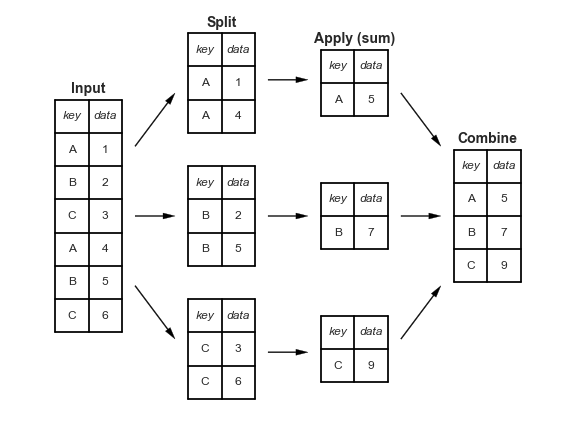

Examples:  What is the population of each state?  Distribution of county incomes?

In [56]:
###
import pandas
c = pandas.read_csv("Counties2010.csv")
c

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09


In [57]:
## First step: group by categorical column
g = c.groupby('State')

In [58]:
g.size()

State
AK     29
AL     67
AR     75
AZ     15
CA     58
CO     64
CT      8
DC      1
DE      3
FL     67
GA    159
HI      5
IA     99
ID     44
IL    102
IN     92
KS    105
KY    120
LA     64
MA     14
MD     24
ME     16
MI     83
MN     87
MO    115
MS     82
MT     57
NC    100
ND     53
NE     93
NH     10
NJ     21
NM     33
NV     17
NY     62
OH     88
OK     77
OR     36
PA     67
RI      5
SC     46
SD     66
TN     95
TX    254
UT     29
VA    136
VT     14
WA     39
WI     72
WV     55
WY     23
dtype: int64

In [59]:
len(g)

51

In [60]:
g.sum()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
State,,,,,,,
AK,710231,626932,1005284,590.7,19781,325.6,570640.94
AL,4779736,4447100,1853465,1019.5,22940,1673.0,50645.39
AR,2915918,2673400,1952906,1026.1,25805,1667.0,52035.48
AZ,6392017,5130632,396235,265.9,8131,316.8,113594.09
CA,37253956,33871648,2138295,1411.1,48934,1432.8,155779.21
CO,5029196,4301261,2193884,1787.8,38324,1346.5,103641.93
CT,3574097,3405565,390639,265.7,6254,197.2,4842.36
DC,601723,572059,62484,47.1,882,29.4,61.05
DE,897934,783600,107980,72.9,2095,71.3,1948.55


In [61]:
## Second step: reduce other columns


In [62]:
g.Population.sum()

State
AK      710231
AL     4779736
AR     2915918
AZ     6392017
CA    37253956
CO     5029196
CT     3574097
DC      601723
DE      897934
FL    18801310
GA     9687653
HI     1360301
IA     3046355
ID     1567582
IL    12830632
IN     6483802
KS     2853118
KY     4339367
LA     4533372
MA     6547629
MD     5773552
ME     1328361
MI     9883640
MN     5303925
MO     5988927
MS     2967297
MT      989415
NC     9535483
ND      672591
NE     1826341
NH     1316470
NJ     8791894
NM     2059179
NV     2700551
NY    19378102
OH    11536504
OK     3751351
OR     3831074
PA    12702379
RI     1052567
SC     4625364
SD      814180
TN     6346105
TX    25145561
UT     2763885
VA     8001024
VT      625741
WA     6724540
WI     5686986
WV     1852994
WY      563626
Name: Population, dtype: int64

In [63]:
import numpy
g.aggregate({'Population': sum, 'IncomePerCapita': numpy.mean})

,Population,IncomePerCapita
State,,
AK,710231,34664.965517
AL,4779736,27663.656716
AR,2915918,26038.746667
AZ,6392017,26415.666667
CA,37253956,36867.155172
CO,5029196,34279.437500
CT,3574097,48829.875000
DC,601723,62484.000000
DE,897934,35993.333333


In [64]:
## Binning: create categorical col from quantitative col
# Distribution of county incomes?


In [65]:
c['bin'] = (c.IncomePerCapita / 10000).map(int)
c.head()

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,bin
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,2
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,3
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,4
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,4


In [66]:
c.groupby('bin').size()

bin
0       36
1       75
2     1719
3     1048
4      185
5       54
6       17
7        6
8        1
9        3
12       1
13       1
dtype: int64

In [67]:
c.IncomePerCapita.median()

28903.0

In [68]:
g.MedianRent.mean()

State
AK     682.103448
AL     342.388060
AR     344.066667
AZ     542.066667
CA     843.689655
CO     598.812500
CT     781.750000
DC     882.000000
DE     698.333333
FL     620.955224
GA     428.660377
HI    1226.800000
IA     380.232323
ID     471.863636
IL     420.833333
IN     459.826087
KS     348.352381
KY     361.066667
LA     390.078125
MA     865.714286
MD     761.791667
ME     531.750000
MI     475.096386
MN     477.494253
MO     368.747826
MS     349.573171
MT     366.491228
NC     447.070000
ND     328.867925
NE     338.247312
NH     730.400000
NJ     899.333333
NM     440.909091
NV     592.529412
NY     611.935484
OH     456.147727
OK     347.376623
OR     556.888889
PA     481.970149
RI     791.600000
SC     420.978261
SD     314.363636
TN     394.736842
TX     404.342520
UT     525.896552
VA     584.102941
VT     632.500000
WA     581.000000
WI     485.958333
WV     346.454545
WY     500.913043
Name: MedianRent, dtype: float64

## Multi-Table Transforms

Combine tables vertically or horizontally?


### Union
* combine tables vertically
* table(n rows) union table(m rows) &rarr; table(n+m rows)
* matching columns
* `d1.append(d2)` or `pandas.concat([d1, d2, d3])`
* https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects
* https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

![](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)


In [69]:
s = pandas.read_csv("States2010.csv")
s.head()

,Name,Abbrev,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33
1,Alaska,AK,710231,626932,40042,26.5,857,17.9,570640.95
2,Arizona,AZ,6392017,5130632,32833,25.7,709,24.9,113594.08
3,Arkansas,AR,2915918,2673400,30177,18.9,425,21.0,52035.48
4,California,CA,37253956,33871648,41805,29.7,1002,27.0,155779.22


In [70]:
c.head()

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,bin
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,2
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,3
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,4
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,4


In [82]:
 u = c.append(s)
#u = pandas.concat([c,s])
u.head()

C:\Users\Jeff Chen\AppData\Local\Temp\ipykernel_17844\1033626202.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  u = c.append(s)


,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,bin,Abbrev
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,2.0,NaN
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,3.0,NaN
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,4.0,NaN
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2.0,NaN
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,4.0,NaN


In [83]:
u.shape, c.shape, s.shape

((3197, 11), (3146, 10), (51, 9))

In [84]:
u

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,bin,Abbrev
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,2.0,NaN
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,3.0,NaN
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,4.0,NaN
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2.0,NaN
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,NaN,8001024,7078515,41727,33.4,777,26.9,39490.09,NaN,VA
47,Washington,NaN,6724540,5894121,41203,30.8,746,25.4,66455.52,NaN,WA
48,West Virginia,NaN,1852994,1808344,29385,17.1,387,25.3,24038.21,NaN,WV
49,Wisconsin,NaN,5686986,5363675,36272,25.5,584,21.1,54157.80,NaN,WI


### Join
* combine tables horizontally
* table(p cols) join table(q cols) &rarr; table (p+q cols)
* matching rows, requires *keys* for matching
* `pandas.merge(left, right, how, left_on, right_on)`
    * left_on = key column in left table
    * right_on = key column in right table
* https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging

![](https://pandas.pydata.org/docs/_images/merging_merge_on_key.png)

#### Duplicate key values?

Join types:
* “one_to_one” or “1:1”: merge keys are unique in both left and right datasets.
* “one_to_many” or “1:m”: merge keys are unique in left dataset, 'foriegn key' on right
* “many_to_one” or “m:1”: merge keys are unique in right dataset, 'foriegn key' on left
* “many_to_many” or “m:m”: full cartesian product.
* https://pandas.pydata.org/docs/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra

#### Missing key values?
* how = merge method for missing keys
* https://pandas.pydata.org/docs/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra

<table class="colwidths-given table">
<colgroup>
<col style="width: 20%">
<col style="width: 20%">
<col style="width: 60%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Merge method</p></th>
<th class="head"><p>SQL Join Name</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">left</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">LEFT</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use keys from left frame only</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">right</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">RIGHT</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use keys from right frame only</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">outer</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">FULL</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use union of keys from both frames</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">inner</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">INNER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use intersection of keys from both frames</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">cross</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">CROSS</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Create the cartesian product of rows of both frames</p></td>
</tr>
</tbody>
</table>

Example: How do county rents differ from their state rents?


In [74]:
j = pandas.merge(s, c, 
                 how='inner', left_on='Abbrev', right_on='State', 
                 suffixes=('_s', '_c'))


In [75]:
j.shape, s.shape, c.shape

((3146, 19), (51, 9), (3146, 10))

In [76]:
j

,Name_s,Abbrev,Population_s,Pop2000_s,IncomePerCapita_s,PercentCollegeGrad_s,MedianRent_s,CommuteTime_s,LandArea_s,Name_c,State,Population_c,Pop2000_c,IncomePerCapita_c,PercentCollegeGrad_c,MedianRent_c,CommuteTime_c,LandArea_c,bin
0,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Autauga,AL,54571,43671,29927,21.8,533,24.9,594.44,2
1,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Baldwin,AL,182265,140415,35021,26.6,629,25.1,1589.78,3
2,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Barbour,AL,27457,29038,23663,12.4,319,22.9,884.88,2
3,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Bibb,AL,22915,20826,23415,11.1,303,30.3,622.58,2
4,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Blount,AL,57322,51024,24586,12.3,357,33.5,644.78,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Sweetwater,WY,43806,37613,46195,16.9,638,21.9,10426.65,4
3142,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,13
3143,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,4
3144,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,4


In [77]:
## how do county rents differ from their state rents?
j['C_S_RentDiff'] = j.MedianRent_c - j.MedianRent_s

In [78]:
j.loc[:, ['Name_s', 'Name_c', 'C_S_RentDiff']]

,Name_s,Name_c,C_S_RentDiff
0,Alabama,Autauga,98
1,Alabama,Baldwin,194
2,Alabama,Barbour,-116
3,Alabama,Bibb,-132
4,Alabama,Blount,-78
...,...,...,...
3141,Wyoming,Sweetwater,113
3142,Wyoming,Teton,345
3143,Wyoming,Uinta,-88
3144,Wyoming,Washakie,-156


In [79]:
j['C_S_RentDiff']

0        98
1       194
2      -116
3      -132
4       -78
       ... 
3141    113
3142    345
3143    -88
3144   -156
3145   -137
Name: C_S_RentDiff, Length: 3146, dtype: int64

In [80]:
j

,Name_s,Abbrev,Population_s,Pop2000_s,IncomePerCapita_s,PercentCollegeGrad_s,MedianRent_s,CommuteTime_s,LandArea_s,Name_c,State,Population_c,Pop2000_c,IncomePerCapita_c,PercentCollegeGrad_c,MedianRent_c,CommuteTime_c,LandArea_c,bin,C_S_RentDiff
0,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Autauga,AL,54571,43671,29927,21.8,533,24.9,594.44,2,98
1,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Baldwin,AL,182265,140415,35021,26.6,629,25.1,1589.78,3,194
2,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Barbour,AL,27457,29038,23663,12.4,319,22.9,884.88,2,-116
3,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Bibb,AL,22915,20826,23415,11.1,303,30.3,622.58,2,-132
4,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33,Blount,AL,57322,51024,24586,12.3,357,33.5,644.78,2,-78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Sweetwater,WY,43806,37613,46195,16.9,638,21.9,10426.65,4,113
3142,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,13,345
3143,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,4,-88
3144,Wyoming,WY,563626,493782,47047,23.2,525,18.1,97093.14,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,4,-156


In [81]:
j.iloc[:, [0,2,3,4,5]]

,Name_s,Population_s,Pop2000_s,IncomePerCapita_s,PercentCollegeGrad_s
0,Alabama,4779736,4447100,32419,21.5
1,Alabama,4779736,4447100,32419,21.5
2,Alabama,4779736,4447100,32419,21.5
3,Alabama,4779736,4447100,32419,21.5
4,Alabama,4779736,4447100,32419,21.5
...,...,...,...,...,...
3141,Wyoming,563626,493782,47047,23.2
3142,Wyoming,563626,493782,47047,23.2
3143,Wyoming,563626,493782,47047,23.2
3144,Wyoming,563626,493782,47047,23.2
